In [1]:
!pip install keybert

In [2]:
!pip install wordcloud

In [5]:
!pip install tqdm

In [6]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import keybert

In [7]:


import os



before_path = os.path.abspath('csv/Popular_Comments_Before.csv')
after_path  = os.path.abspath('csv/Popular_Comments_After.csv')


# CSV-Dateien laden, wenn sie existieren
if os.path.exists(before_path) and os.path.exists(after_path):
    Comments_Before = pd.read_csv(before_path)
    Comments_After  = pd.read_csv(after_path)
    print("Dateien erfolgreich geladen!")
else:
    print("Eine oder beide Dateien wurden nicht gefunden. Pfade prüfen!")

Dateien erfolgreich geladen!


In [8]:

model = keybert.KeyBERT()

In [9]:
keywords_list = []
for row_i in tqdm(range(Comments_After.shape[0])):
    row = Comments_After.iloc[row_i]
    keywords = []
    title_abstract = row['text'] 
    keywords.append(model.extract_keywords(title_abstract,
                       keyphrase_ngram_range = (1,1)))
    keywords.append(model.extract_keywords(title_abstract,
                       keyphrase_ngram_range = (1,2)))
    keywords_list.append(keywords)

  0%|          | 0/500 [00:00<?, ?it/s]

In [10]:
Comments_Before['keywords'] = keywords_list

In [11]:
Comments_Before

,Unnamed: 0.1,Unnamed: 0,videoId,author,publishedAt,likeCount,text,period,keywords
0,0,44,bQNsHivR9AU,@jochenkrebs9685,2022-10-20T19:19:36Z,7917,Schade dass Politiker nicht persönlich für das...,Before Founding,"[[(keine, 0.4463), (kriege, 0.4205), (es, 0.40..."
1,1,121,kyUaDbVjMr0,@seemax7956,2021-11-19T07:22:26Z,7385,Um Loriot zu zitieren „In Krisenzeiten suchen ...,Before Founding,"[[(diplomatie, 0.4547), (unsere, 0.4443), (ges..."
2,2,40,bQNsHivR9AU,@sternmeer5346,2022-10-20T19:04:43Z,5816,"Absolut jedes Wort, das Sie zur Beschreibung d...",Before Founding,"[[(propaganda, 0.4457), (kämpfen, 0.3681), (mü..."
3,3,0,WCwx94TOGPQ,@andreasmann1111,2022-02-03T19:47:21Z,5571,Liebe Sahra schön dich gesund zu sehen. Im Geg...,Before Founding,"[[(rechtliche, 0.5163), (aufgepasst, 0.4733), ..."
4,4,332,LbnRTQTJ7bQ,@fffrankk,2022-01-27T19:56:17Z,5275,"Wie üblich: Tausend Dank dafür, eine der wenig...",Before Founding,"[[(deutschland, 0.4927), (bloß, 0.3934), (hint..."
...,...,...,...,...,...,...,...,...,...
495,495,160,aIylqpDNVIc,@letters_of_bach,2023-03-15T17:34:30Z,501,Bitte endlich Frieden!!!,Before Founding,"[[(politiklandschaft, 0.5798), (deutsche, 0.48..."
496,496,227,ulaw8J_YFLw,@lucasstolz3717,2023-06-16T16:10:16Z,500,Freiheit für Julian assange. Wikileaks muss ar...,Before Founding,"[[(wagenknecht, 0.463), (auftreten, 0.4252), (..."
497,497,1022,UDGl7rCLrVI,@Flo-1887,2021-02-18T16:09:02Z,500,Wie recht Sie mal wieder haben Frau Wagenknecht!,Before Founding,"[[(wagenknecht, 0.4159), (hervorragend, 0.3648..."
498,498,1236,x4ms74GOJq8,@martinafueck,2023-09-07T16:50:40Z,499,"Die Ampel muss unbedingt abtreten, sonst fährt...",Before Founding,"[[(spaß, 0.5446), (gemacht, 0.5274), (toll, 0...."


In [12]:
def flatten(xss):
    return [x for xs in xss for x in xs]

In [13]:
flattened_keywords = flatten(flatten(keywords_list))

In [14]:
flattened_keywords = [item[0] for item in flattened_keywords]

In [15]:
flattened_keywords


['keine',
 'kriege',
 'es',
 'müssten',
 'politiker',
 'keine kriege',
 'es gäbe',
 'müssten politiker',
 'die es',
 'gäbe keine',
 'diplomatie',
 'unsere',
 'geschichte',
 'schande',
 'eine',
 'unsere diplomatie',
 'diplomatie ist',
 'unsere geschichte',
 'eine schande',
 'frieden vermitteln',
 'propaganda',
 'kämpfen',
 'müssen',
 'orwell',
 'geschrei',
 'krieg propaganda',
 'kämpfen müssen',
 'george orwell',
 'propaganda das',
 'propaganda',
 'rechtliche',
 'aufgepasst',
 'öffentlich',
 'menschen',
 'diskussion',
 'rechtliche gut',
 'öffentlich rechtliche',
 'das diskussion',
 'gut aufgepasst',
 'rechtliche',
 'deutschland',
 'bloß',
 'hinterher',
 'sondern',
 'keine',
 'deutschland hat',
 'deutschland',
 'position sondern',
 'usa hinterher',
 'rennt bloß',
 'moderatoren',
 'dazwischen',
 'quatschen',
 'immer',
 'die',
 'die moderatoren',
 'moderatoren immer',
 'moderatoren',
 'immer dazwischen',
 'quatschen die',
 'hoffentlich',
 'zuhaus',
 'bald',
 'allein',
 'ist',
 'hoffentlich

In [16]:
keywords_df = pd.DataFrame()
keywords_df['words'] = Counter(flattened_keywords).keys()
keywords_df['numbers'] = Counter(flattened_keywords).values()
frequent_words = keywords_df.loc[keywords_df['numbers'] > 1].sort_values(by='numbers', ascending=False)
frequent_words


,words,numbers
73,wagenknecht,117
104,nicht,67
75,und,60
59,ist,56
80,frau wagenknecht,52
...,...,...
914,hohen,2
913,dazwischenschreien,2
912,und frieden,2
909,ohne waffen,2


In [17]:
# Define custom list of words to exclude (case insensitive)
filtered_words = ["ich", 
                  "und", 
                  "nicht", 
                  "das", 
                  "ist", 
                  "zu", 
                  "der", 
                  "eine",
                  "sie",
                  "auch",
                  "auf"
                  ]

# Filter out words by lowercasing
filtered_keywords = [w for w in flattened_keywords if w.lower() not in [fw.lower() for fw in filtered_words]]


In [18]:
filtered_keywords_df = pd.DataFrame()
filtered_keywords_df['words'] = Counter(filtered_keywords).keys()
filtered_keywords_df['numbers'] = Counter(filtered_keywords).values()
frequent_words_filtered = filtered_keywords_df.loc[filtered_keywords_df['numbers'] > 1].sort_values(by='numbers', ascending=False)


In [19]:
import json 

json_str = frequent_words_filtered.to_json(orient="records", indent=2, force_ascii=False)

with open("Sahra_Wagenknecht_Words_A-test.json", "w", encoding="utf-8") as f:
    f.write(json_str)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25064\3797740267.py:119: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("Pastel1")


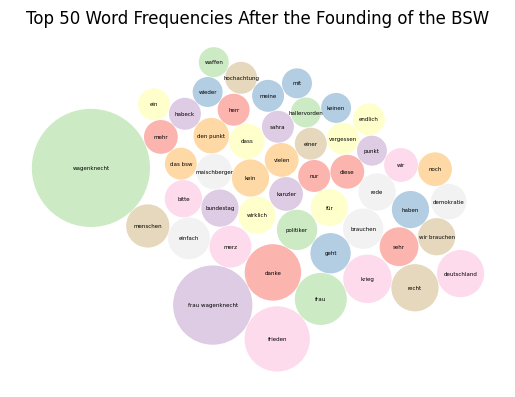

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random


#source: https://matplotlib.org/stable/gallery/misc/packed_bubbles.html#sphx-glr-gallery-misc-packed-bubbles-py
class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # initial grid layout
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3])

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return np.argmin(distance, keepdims=True)

    def collapse(self, n_iterations=50):
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                dir_vec = self.com - self.bubbles[i, :2]
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        new_point1 = self.bubbles[i, :2] + orth * self.step_dist
                        new_point2 = self.bubbles[i, :2] - orth * self.step_dist
                        dist1 = self.center_distance(self.com, np.array([new_point1]))
                        dist2 = self.center_distance(self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()
            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2
    def plot(self, ax, labels, colors, fontsize):
        """
        Draw the bubble plot with a static font size.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
            The matplotlib axes to draw on.
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        fontsize : int
            Font size of the labels.
        """
        for i in range(len(self.bubbles)):
            # Draw bubble
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i]
            )
            ax.add_patch(circ)

            # Draw label with fixed font size
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment="center",
                    verticalalignment="center",
                    fontsize=fontsize)
# Take the 10 most frequent words
top10 = frequent_words_filtered.nlargest(50, "numbers")

# Convert to numpy arrays
labels = top10['words'].to_numpy()
areas = top10['numbers'].to_numpy()

# Create bubble chart
bubble_chart = BubbleChart(area=areas, bubble_spacing=0.2)
bubble_chart.collapse()

# Generate colors from a colormap
cmap = plt.cm.get_cmap("Pastel1")
colors = [cmap(i / len(labels)) for i in range(len(labels))]

# Shuffle colors randomly
random.shuffle(colors)


# Plot
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(ax, labels, colors, fontsize=4)
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title("Top 50 Word Frequencies After the Founding of the BSW")
plt.savefig('packed_bubble_chart_after.png', dpi=300)
plt.show()

In [ ]:
wordcloud = WordCloud(background_color="white",
                      width=2500,
                      height=1000,
                      scale=2.0,
                      colormap='twilight',
                      stopwords=['wagenknecht','Wagenknecht'],
                      min_font_size=6).fit_words(dict(Counter(filtered_keywords))).to_file('sahra_wagenknecht_after_word_cloud_test.png')

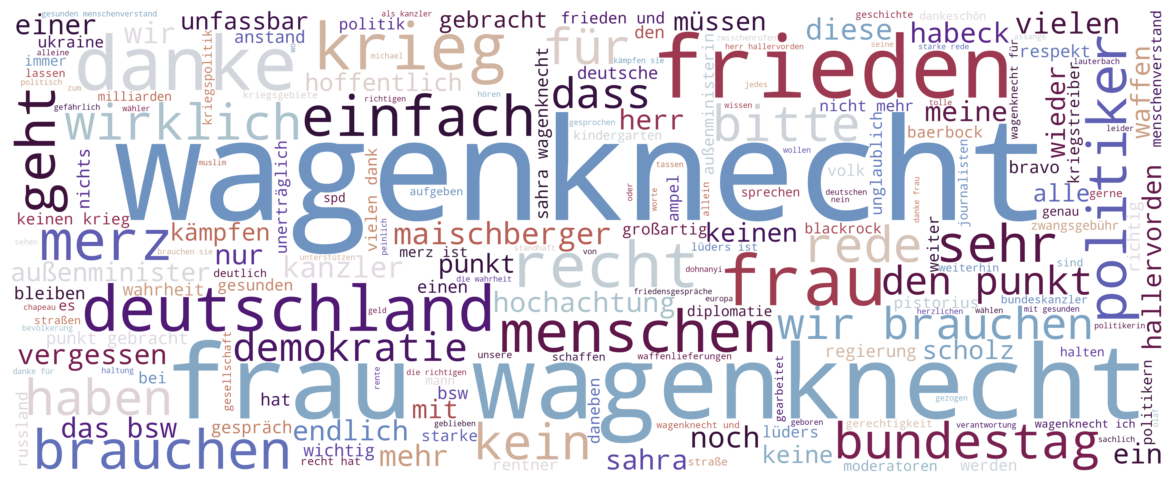

In [ ]:
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()